# INF4039 Deep Learning Systems / Giliojo mokymo sistemų taikymai
**Individualus namų darbas**
#
**Vytenis Ropė - IF2000035**

# 1. Reikalingų bibliotekų diegimas ir importavimas

In [66]:
#pip install pandas # Darbui su duomenimis
#pip install matplotlib # Diagramų atvaizdavimui
#pip install scipy  # Koreliacijų skaičiavimui
#!pip install tensorflow
#!pip install keras
#!pip install pydot
#!pip install graphviz # Neuroninio tinklo struktūrai atvaizduoti
#!pip install plotly #
#!pip install nbformat>=4.2.0

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 2. Duomenų importavimas iš lokalaus .csv failo

In [2]:
#Importavimo metodas lokaliam failui
df = pd.read_csv("Deimantai_duomenys_2023.csv")
df

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [ ]:
#Importavimo metodas github failui
url = 'https://raw.githubusercontent.com/vytenis999/Individualus_darbas_Deimant-_kain-_prognozavimas/master/Deimantai_duomenys_2023.csv'
df = pd.read_csv(url)
df

# 3. Duomenų paruošimas

#### Stulpelių duomenų tipo nustatymas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53943 non-null  int64  
 1   carat    53943 non-null  float64
 2   cut      53943 non-null  object 
 3   color    53943 non-null  object 
 4   clarity  53943 non-null  object 
 5   depth    53943 non-null  float64
 6   table    53943 non-null  float64
 7   price    53943 non-null  int64  
 8   x        53943 non-null  float64
 9   y        53943 non-null  float64
 10  z        53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


#### Eilučių ir stulpelių skaičiaus nustatymas

In [4]:
df.shape

(53943, 11)

#### Peržiūrima ar nėra trūkstamų duomenų

In [5]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Kadangi nėra trūkstamų reikšmių, tad nereikia atlikti papildomų veiksmų. Kitu atveju tektų pašalinti tas eilutes arba taikyti kitus metodus: užpildydimą fiksuotu kintamuoju(scalar), pakeičiant vidurkiu, mediana ar moda, užpildant duomenims esančiais prieš eilute ar po jos ar naudojant KNN imputer k-arčiausio kaimyno metodą.

#### Nereikalingų stulpelių pašalinimas

Pašalinamas "id" stulpelis, kadangi jis nesuteiks vertės neuroniniam tinklui.

In [6]:
df = df.copy()
print(f"Prieš pašalinimą: {list(df)}")

df.drop('id', axis=1, inplace=True)

print(f"Po pašalinimo: {list(df)}")

df

Prieš pašalinimą: ['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Po pašalinimo: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


#### Pasikartojančių eilučių radimas ir pašalinimas

In [7]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,carat,cut,color,clarity,depth,table,price,x,y,z
1004,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


Rastos besiduplikuojančios 295 eilutės bus pašalintos.

In [8]:
df = df.drop_duplicates()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
df = df.reset_index()
df.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.drop('index', axis=1, inplace=True)

In [11]:
col_to_move = df.pop('price')
df.insert(0, 'price', col_to_move)
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53789,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53790,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53791,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53792,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


## Duomemų tyrinėjimas

#### Aprašomoji statistika

In [12]:
df.describe()

,price,carat,depth,table,x,y,z
count,53794.000000,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,3933.065082,0.79778,61.748080,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,1.429909,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000
max,18823.000000,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000


"Karatų" vidurkis yra maždaug 0,78, o std - maždaug 0,47, t. y. daugiau nei pusė vidurkio, o tai rodo, kad duomenys labai skiriasi.

Kainos vidurkis yra apie 3933 , o std apir 3988. Nuokrypis yra didesnis nei vidurkis.

"x", "y", "z" turi mažiausias reikšmes nulį. Tai reiškias, kad yra klaidingų eilučių.

In [13]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53775, 10)

#### Koreliacijos koeficientai

In [14]:
df_statistical = df.copy()
df_statistical = df_statistical.drop(['cut', 'color', 'clarity'], axis=1)
corr_matrix = df_statistical.corr(method='kendall')
display(corr_matrix)

,price,carat,depth,table,x,y,z
price,1.000000,0.834193,0.005866,0.121171,0.831074,0.829802,0.820423
carat,0.834193,1.000000,0.019889,0.138540,0.961081,0.957789,0.952488
depth,0.005866,0.019889,1.000000,-0.178778,-0.017887,-0.019270,0.071050
table,0.121171,0.138540,-0.178778,1.000000,0.143004,0.138194,0.112186
x,0.831074,0.961081,-0.017887,0.143004,1.000000,0.968273,0.913323
y,0.829802,0.957789,-0.019270,0.138194,0.968273,1.000000,0.912111
z,0.820423,0.952488,0.071050,0.112186,0.913323,0.912111,1.000000


Pagal šią koreliacijos lentelę galima teigti, kad labiausiai kaina priklauso nuo karatų, ilgio(x), pločio(y), aukščio(z). Labai maža koreliacija pastebima lyginant plokštumos pločio parametrą. Ypatingai maža kaino priklausomybė nuo gylio.

#### Histogramos

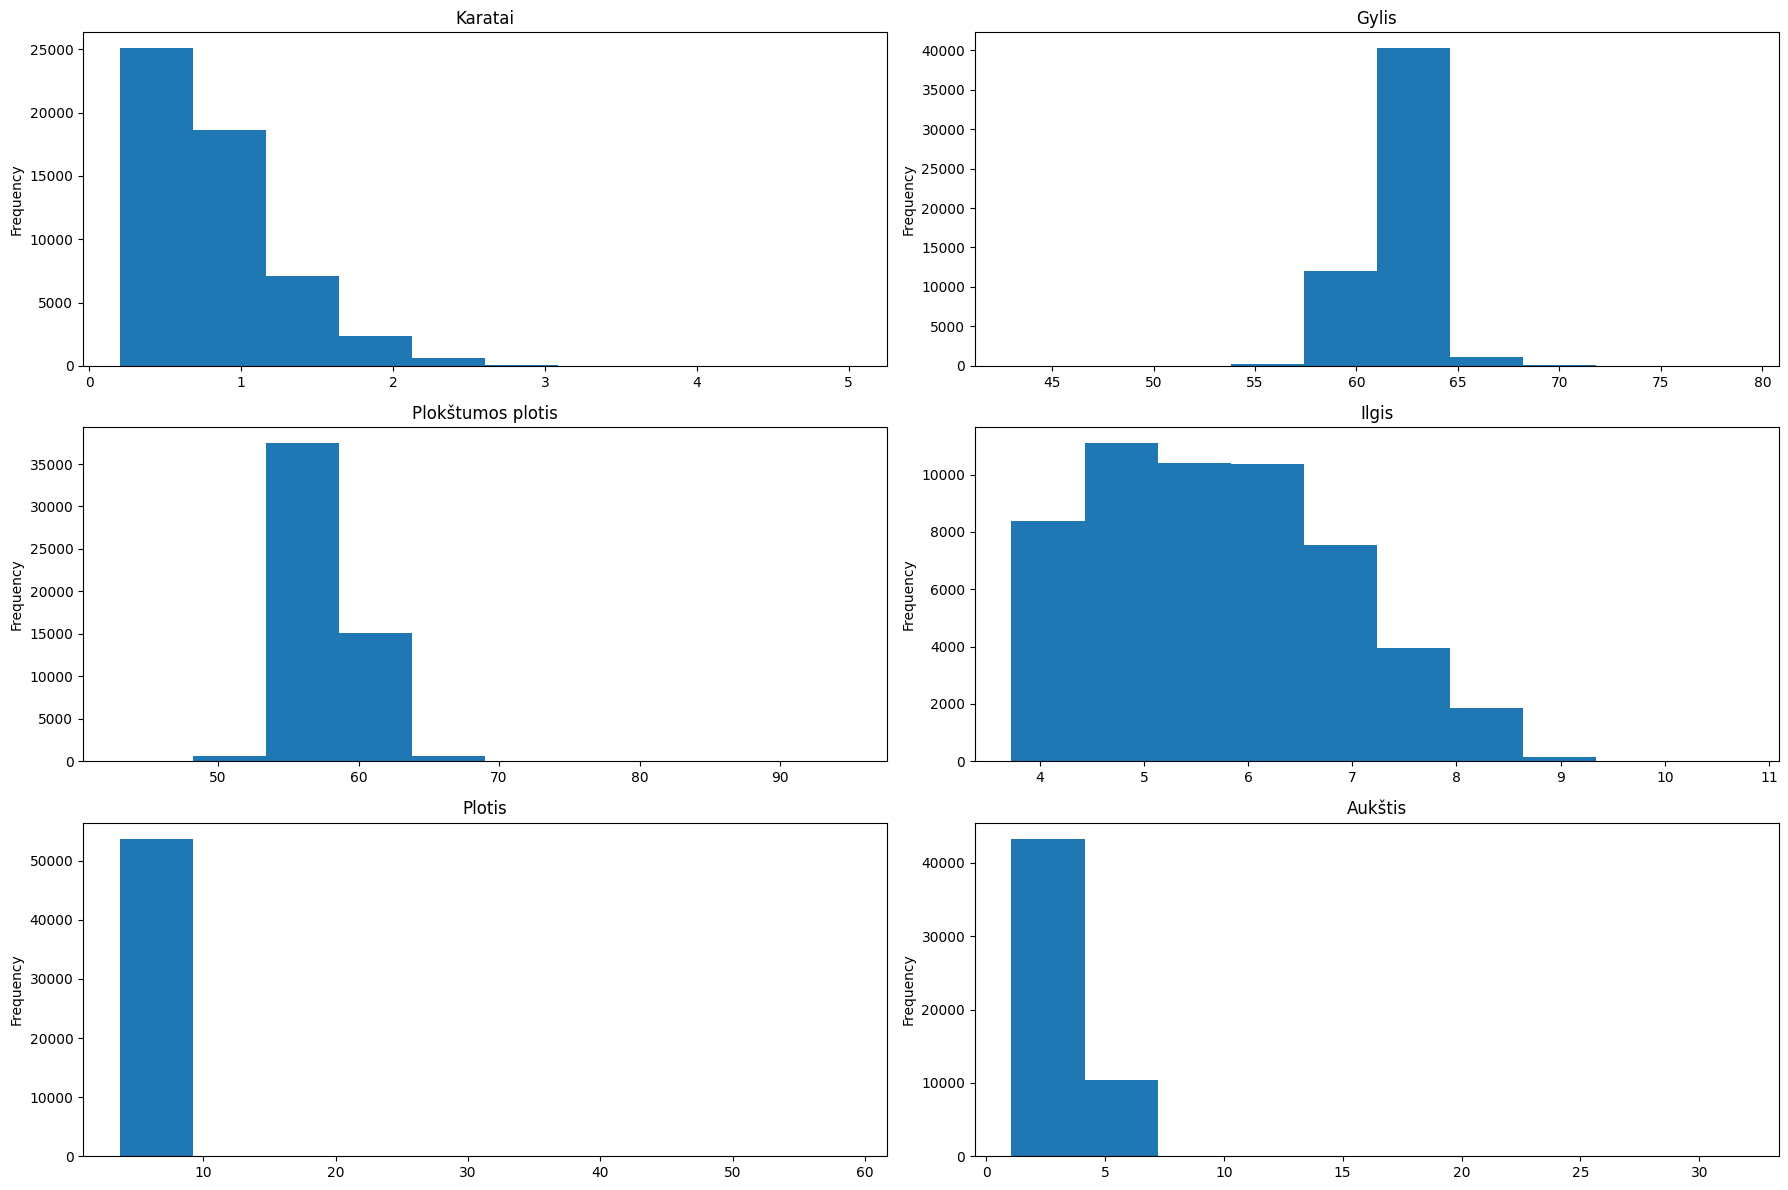

In [15]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1)
df['carat'].plot(kind='hist', title='Karatai')

plt.subplot(3, 2, 2)
df['depth'].plot(kind='hist', title='Gylis')

plt.subplot(3, 2, 3)
df['table'].plot(kind='hist', title='Plokštumos plotis')

plt.subplot(3, 2, 4)
df['x'].plot(kind='hist', title='Ilgis')

plt.subplot(3, 2, 5)
df['y'].plot(kind='hist', title='Plotis')

plt.subplot(3, 2, 6)
df['z'].plot(kind='hist', title='Aukštis')

plt.tight_layout()
plt.show()

1. Karatų histograma (viršuje kairėje): Šioje histogramoje matomas mažėjantis dažnis didėjant x ašies reikšmei, o tai rodo, kad pasiskirstymas yra dešininis. Ji atspindi diskretųjį kintamąjį, kurio vertės svyruoja nuo 0 iki 5. 

2. Gylio histograma (viršuje dešinėje): Šioje histogramoje pavaizduotas dažnių pasiskirstymas. Pagrindiniai atvejai susitelkę ties 65, o mažiau - 55. Tai rodo, kad pasiskirstymas koncentruotas aplink centrinę reikšmę su galimu nuokrypiu.

3. Plokštumos pločio histograma (centre kairėje): Ši histograma rodo, kad pasiskirstymas yra kairysis. Dauguma duomenų taškų patenka į 60-70 taškų intervalą pagal x ašį, o dažnis mažėja, kai reikšmės yra didesnės.

4. Ilgio histograma (viduryje dešinėje): Šioje histogramoje matomas šiek tiek tolygus pasiskirstymas tarp 4 ir 9 reikšmių x ašyje. Didėjant vertei dažnis palaipsniui mažėja.

5. Pločio histograma (apačioje kairėje): Šioje histogramoje pateikiamas duomenų rinkinys, kurio didžiausias dažnis yra mažiausiame intervale (0-10), o didėjant vertei jis greitai mažėja, o tai rodo, kad pasiskirstymas yra dešininis. Duomenys yra diskretūs, svyruojantys maždaug nuo 0 iki 50.

6. Aukščio histograma (apačioje dešinėje): Šioje histogramoje matomas kairės pusės pasiskirstymas su dideliu dažniu esant mažai x ašies vertei (apie 5) ir staigiu kritimu didėjant vertei.

Histogramos rodo, kad yra nuokrypių. Reikės atlikti nuokrypių pašalinimą ir duomenų normalizacija.

#### Sklaidos diagramos

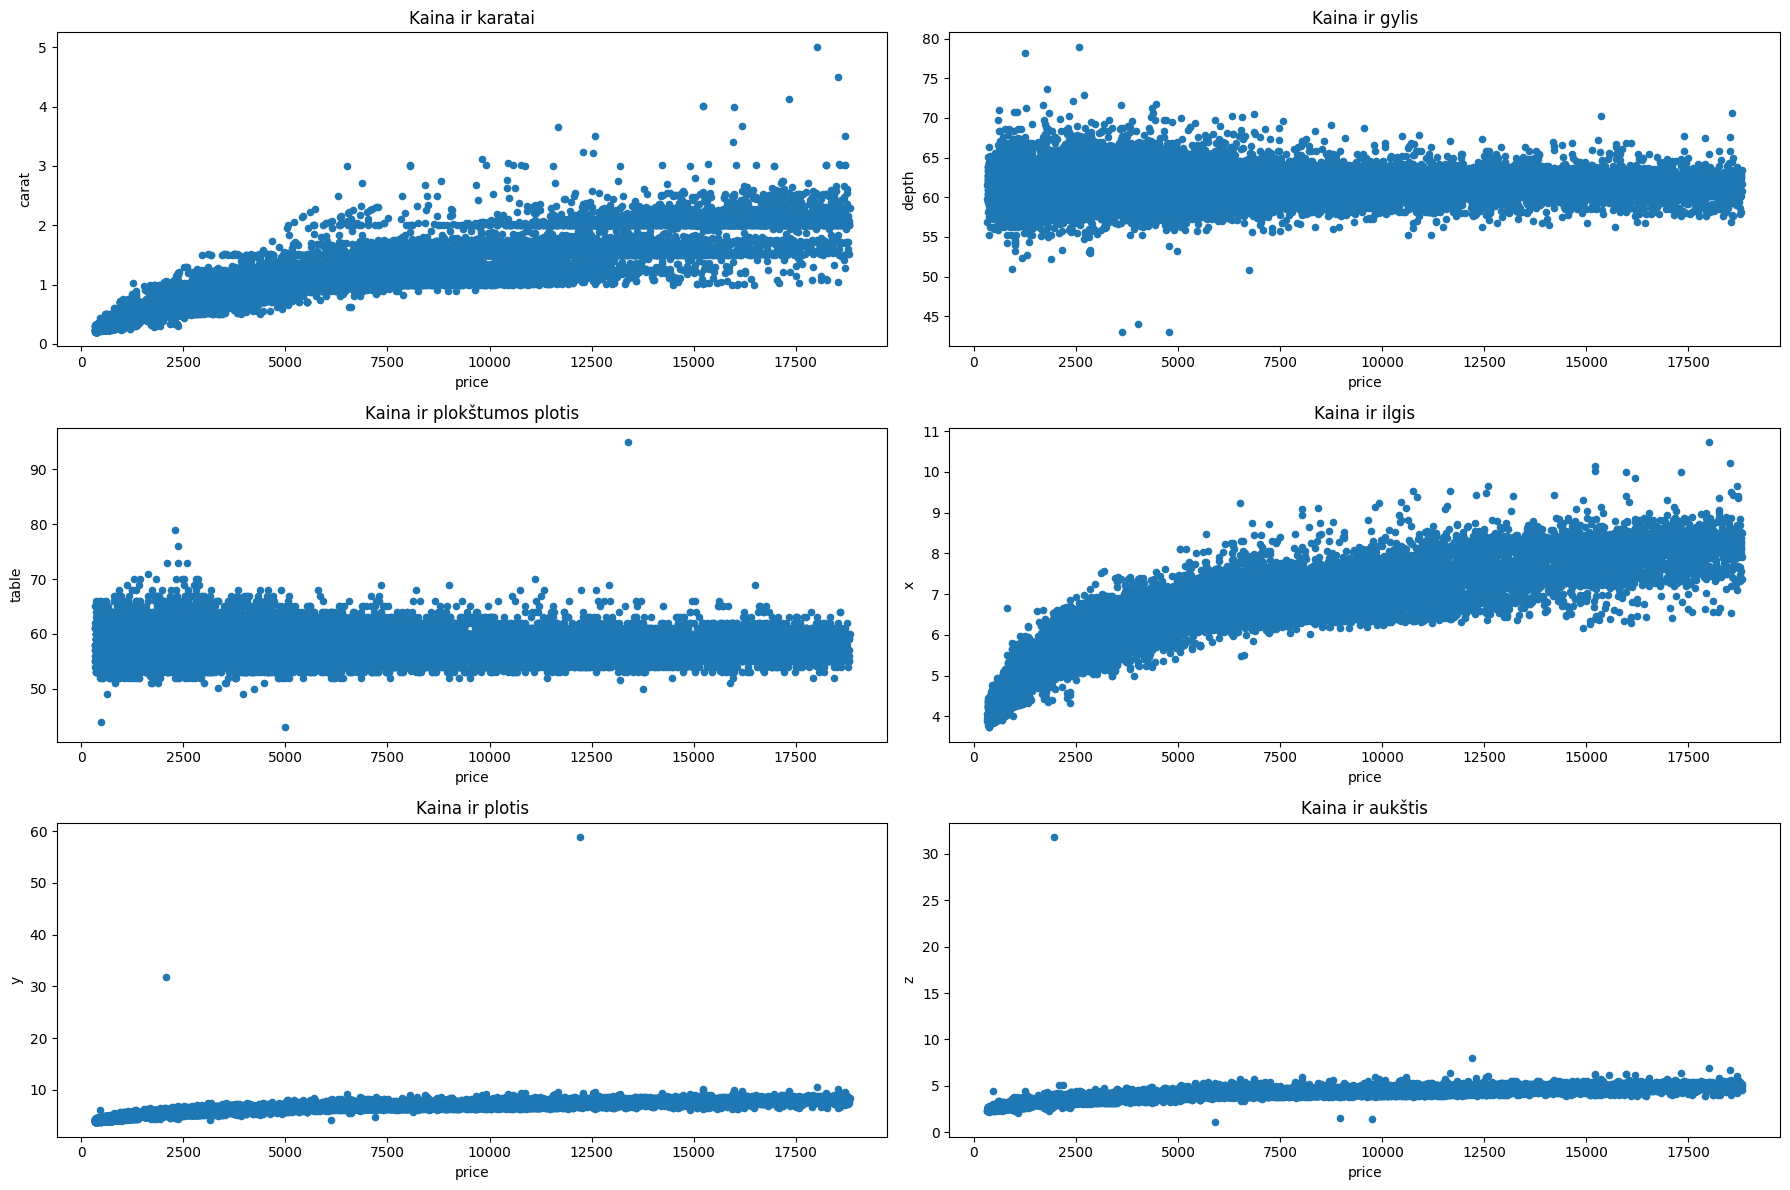

In [16]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1)
df.plot(kind='scatter', x='price', y='carat', title='Kaina ir karatai', ax=plt.gca());

plt.subplot(3, 2, 2)
df.plot(kind='scatter', x='price', y='depth', title='Kaina ir gylis', ax=plt.gca());

plt.subplot(3, 2, 3)
df.plot(kind='scatter', x='price', y='table', title='Kaina ir plokštumos plotis', ax=plt.gca());

plt.subplot(3, 2, 4)
df.plot(kind='scatter', x='price', y='x', title='Kaina ir ilgis', ax=plt.gca());

plt.subplot(3, 2, 5)
df.plot(kind='scatter', x='price', y='y', title='Kaina ir plotis', ax=plt.gca());

plt.subplot(3, 2, 6)
df.plot(kind='scatter', x='price', y='z', title='Kaina ir aukštis', ax=plt.gca());

plt.tight_layout()
plt.show()

1. Kaina ir karatai (viršuje kairėje): Atrodo, kad egzistuoja teigiama koreliacija, kai didesnės karatų vertės brangakmeniai yra brangesni. Didėjant karatų vertei, duomenų taškų sklaida tampa įvairesnė.

2. Kaina ir gylis (viršuje dešinėje): Taškai yra plačiai išsibarstę, be aiškios tendencijos, o tai rodo, kad koreliacija tarp kainos ir gylio yra maža arba jos visai nėra. Yra keletas taškų, nutolusių nuo pagrindinio klasterio ir galinčių būti nuokrypiais.

3. Kaina ir plokštumos plotis (centre kairėje): Panašiai kaip ir gylio atveju, taškų sklaida yra didelė, o tai rodo mažą koreliaciją tarp kainos ir plokštumos pločio. Dauguma duomenų taškų sukoncentruoti horizontalioje juostoje, o tai gali reikšti, kad plokštumos plotis turi standartinį diapazoną nepriklausomai nuo kainos.

4. Kaina ir ilgis (centre dešinėje): Pastebima akivaizdi teigiama koreliacijos tendencija, rodanti, kad didėjant ilgiui didėja ir kaina.

5. Kaina ir plotis (apačioje kairėje): Pastebima nedidelė teigiama tendencija, rodanti, kad platesnių deimantų kainos gali būti didesnės. Kai kurie taškai gerokai nutolę nuo pagrindinės tendencijos, todėl gali prireikti juos pašalinti.

6. Kaina ir aukštis (apačioje dešinėje): Yra nedidelė teigiama koreliacija, tačiau ji nėra tokia stipri kaip ilgio ar karatų diagramose. Kai kurie taškai gerokai nutolę nuo pagrindinės tendencijos, todėl gali prireikti juos pašalinti.

Pastebima maža koreliacija tarp kainos ir gylio, bei ploštumos pločio. Taip pat pastebimas nuokrypis gylio(depth), plokštumos pločio(table), pločio(y) ir aukščio(z) elementuose.

## Duomenų apdirbimas

### Nuokrypių identifikavimas ir pašalinimas

#### IQR metodas

Nuokrypių identifikavimui ir pašalinimui naudosiu Inter-Quartile Range (IQR). Kadangi šis metodas patikimesnis nei standartinis nuokrypis ir nereikalauja tiek skaičiavimo resursų, kaip Local Outlier Factor (LOF).

In [17]:
df2 = df.copy()

In [18]:
# Pasirinkti tik skaitmennų stulpelius
data_numerical = df2.select_dtypes(include=['int', 'float'])

# Tarpkvartilinio intervalo (IQR) apskaičiavimas
Q1 = data_numerical.quantile(0.25)
Q3 = data_numerical.quantile(0.75)
IQR = Q3 - Q1

# Skaitmeninių stulpelių nuokrypių kaukės sukūrimas
mask = (data_numerical < (Q1 - 1.5 * IQR)) | (data_numerical > (Q3 + 1.5 * IQR))

# Kaukės pritaikymas pradiniam duomenų rėmeliui, kad išliktų visi stulpeliai
data_outliers_IQR = df2[~(mask).any(axis=1)]

# Indekso atstatymas
data_outliers_IQR.reset_index(drop=True, inplace=True)

data_outliers_IQR

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
3,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
4,336,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
47407,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
47408,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
47409,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
47410,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


### Kategorinių stulpelių keitimas skaitinėmis reikšmėmis

In [19]:
df3 = data_outliers_IQR.copy()

In [20]:
df3['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [21]:
df3['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [22]:
df3['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [23]:
#'cut', 'color', ir 'clarity' stulpelius paverskite kategoriniais tipais
df3['cut'] = df3['cut'].astype('category')
df3['color'] = df3['color'].astype('category')
df3['clarity'] = df3['clarity'].astype('category')

enc = OneHotEncoder()

# Kelių stulpelių perdavimas kodavimo įrenginiui
enc_data = pd.DataFrame(enc.fit_transform(df3[['cut', 'color', 'clarity']]).toarray(), 
                        columns=enc.get_feature_names_out(['cut', 'color', 'clarity']))

# Užtikrinama, kad indeksai būtų išlyginti
enc_data.index = df3.index

# Sujungti su pagrindiniu DataFrame
df4 = df3.join(enc_data)

display(df4)

,price,carat,cut,color,clarity,depth,table,x,y,z,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,336,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47407,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47408,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47409,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47410,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
df4.drop('cut', axis=1, inplace=True)
df4.drop('color', axis=1, inplace=True)
df4.drop('clarity', axis=1, inplace=True)

In [25]:
print(f"Visos: {list(df4)}")

Visos: ['price', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


### Duomenų normalizacija

In [26]:
df5 = df4.copy()

#### MinMax scalling

In [27]:
columns_for_rescale = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
columns_other = ['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

scaler = MinMaxScaler()

df5_normalized = pd.DataFrame(scaler.fit_transform(df5[columns_for_rescale]), columns=columns_for_rescale, index=df5.index)

# Sujungti normalizuotus skaitinius duomenis su kategoriniais duomenimis
df5 = pd.concat([df5_normalized, df5[columns_other]], axis=1)

#### Robust scalling

In [81]:
columns_for_rescale = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
columns_other = ['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

scaler = RobustScaler()

X_numeric_robust = pd.DataFrame(scaler.fit_transform(df5[columns_for_rescale]), columns=columns_for_rescale)

# Sujungti normalizuotus skaitinius duomenis su kategoriniais duomenimis
df5 = pd.merge(X_numeric_robust, df5[columns_other], left_index=True, right_index=True)

In [28]:
df5

,price,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.000000,0.016667,0.457627,0.260870,0.048352,0.065359,0.262211,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.005556,0.169492,0.782609,0.035165,0.034858,0.231362,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000692,0.050000,0.610169,0.521739,0.103297,0.119826,0.313625,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000779,0.061111,0.762712,0.521739,0.134066,0.145969,0.344473,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000865,0.022222,0.677966,0.434783,0.046154,0.061002,0.275064,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47407,0.210349,0.288889,0.338983,0.434783,0.443956,0.453159,0.537275,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47408,0.210349,0.288889,0.728814,0.260870,0.430769,0.450980,0.565553,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47409,0.210349,0.277778,0.677966,0.695652,0.424176,0.435730,0.552699,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47410,0.210349,0.366667,0.372881,0.521739,0.531868,0.531590,0.598972,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
df5.to_csv('Apdorotas.csv', index=False)

# 4. Duomenų padalinimas į apmokymo ir testavimo dalis

#### Suskirstyti į įvestis ir išvestis

In [110]:
X = df5.iloc[:, 1:]  #Įvesties stulpeliai
y = df5.iloc[:, 0]   #Išvesties stulpelis    
print(X.shape, y.shape)

(47412, 26) (47412,)


#### Suskirstyti į apmokymo ir testavimo duomenis

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37929, 26) (9483, 26) (37929,) (9483,)


#### K-Fold cross 

In [111]:
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 5

# Get the fold indices
fold_indices = kfold_indices(X, k)

fold_indices[0]


(array([ 9482,  9483,  9484, ..., 47409, 47410, 47411]),
 array([   0,    1,    2, ..., 9479, 9480, 9481]))

In [54]:
X.iloc[fold_indices[4][0]]

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.016667,0.457627,0.260870,0.048352,0.065359,0.262211,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.005556,0.169492,0.782609,0.035165,0.034858,0.231362,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.050000,0.610169,0.521739,0.103297,0.119826,0.313625,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.061111,0.762712,0.521739,0.134066,0.145969,0.344473,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.022222,0.677966,0.434783,0.046154,0.061002,0.275064,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37925,0.172222,0.542373,0.260870,0.309890,0.313725,0.455013,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37926,0.172222,0.593220,0.347826,0.312088,0.313725,0.460154,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37927,0.172222,0.864407,0.173913,0.298901,0.298475,0.470437,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47410,0.366667,0.372881,0.521739,0.531868,0.531590,0.598972,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 5. Apmokymas

# Random Forest regressor

#### Su K-Fold cross

In [112]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(
    n_estimators=1000,     # Medžių skaičius. Paprastai didesnis skaičius lemia geresnį našumą, tačiau po tam tikro laiko našumas tampa nedidelis.
    max_depth=20,         # Didžiausias medžių gylis. Gilesni medžiai gali modeliuoti sudėtingesnius modelius, tačiau taip pat gali lemti persimokymą.
    min_samples_split=4,  # Mažiausias mėginių skaičius, reikalingas vidiniam mazgui padalyti. Padidinus šį rodiklį, modelis gali neišmokti itin specifinių prognozių modelių, taip sumažinant perteklinį pritaikymą.
    min_samples_leaf=2,   # Mažiausias mėginių skaičius, kurio reikia, kad būtų lapiniame mazge. Tai gali išlyginti modelį, ypač regresijos atveju.
    max_features='sqrt',  # Added parameter
    random_state=42
)

scores = []

for train_indices, test_indices in fold_indices:

    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    fold_score = mean_squared_error(y_test, y_pred)
    
    scores.append(fold_score)

mean_score = np.mean(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Squared Error:", mean_score)

K-Fold Cross-Validation Scores: [0.0041457658278145, 0.008368427952790703, 0.014559361472264555, 0.0005834667808607227, 0.0015101057728858745]
Mean Squared Error: 0.005833425561323271


#### Be K-Fold cross

In [109]:
# Atsitiktinio miško regresoriaus kūrimas
rf_regressor = RandomForestRegressor(
    n_estimators=1000,     # Medžių skaičius. Paprastai didesnis skaičius lemia geresnį našumą, tačiau po tam tikro laiko našumas tampa nedidelis.
    max_depth=20,         # Didžiausias medžių gylis. Gilesni medžiai gali modeliuoti sudėtingesnius modelius, tačiau taip pat gali lemti persimokymą.
    min_samples_split=4,  # Mažiausias mėginių skaičius, reikalingas vidiniam mazgui padalyti. Padidinus šį rodiklį, modelis gali neišmokti itin specifinių prognozių modelių, taip sumažinant perteklinį pritaikymą.
    min_samples_leaf=2,   # Mažiausias mėginių skaičius, kurio reikia, kad būtų lapiniame mazge. Tai gali išlyginti modelį, ypač regresijos atveju.
    max_features='sqrt',  # Added parameter
    random_state=42
)
rf_regressor.fit(X_train, y_train)

# Daromos prognozės
rf_predictions = rf_regressor.predict(X_test)

# Modelio vertinimas
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - Mean Squared Error: {rf_mse}")
r2_percentage = rf_r2 * 100
print(f"R² score (as percentage): {r2_percentage:.2f}%")

Random Forest - Mean Squared Error: 0.0011082761322727863
R² score (as percentage): 98.02%


# Neural network


#### K-Fold cross (Leidžiama kai naudojama)

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from sklearn.metrics import mean_squared_error

def create_model():
    model = Sequential()  
    model.add(Dense(32, activation="relu", input_shape=(26,)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model


scores = []
histories = []

for train_indices, test_indices in fold_indices:

    model = create_model()

    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)
    
    histories.append(history)
    
    y_pred = model.predict(X_test).flatten()
    
    fold_score = mean_squared_error(y_test, y_pred)
    
    scores.append(fold_score)

mean_score = np.mean(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Squared Error:", mean_score)

297/297 [==============================] - 1s 2ms/step
K-Fold Cross-Validation Scores: [0.0015553725417060146, 0.003487680036479138, 0.003082420358376085, 0.0005206742584050798, 0.0004365722290103986]
Mean Squared Error: 0.0018165438847953432


#### Train-Test split (Leidžiama kai naudojama)

In [96]:
from keras.layers import Dropout

def create_model():
    model = Sequential()
    #model.add(Dense(128, activation="relu", name="layer1", input_shape=(26,)))
    #model.add(Dropout(0.2))
    #model.add(Dense(64, activation="relu", name="layer1", input_shape=(26,)))
    #model.add(Dropout(0.2))
    model.add(Dense(32, activation="relu", name="layer1", input_shape=(26,)))
    #model.add(Dropout(0.2))
    model.add(Dense(1, activation = "linear", name="layer2"))
    return model

model = create_model()
model.summary()


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                864       
                                                                 
 layer2 (Dense)              (None, 1)                 33        
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
model.compile(
    #optimizer = "rmsprop",
    #optimizer = 'sgd',
    optimizer = 'adam',
    loss = "mean_squared_error",
    metrics = ['MeanSquaredError'])

history = model.fit(X_train, y_train,
          batch_size=32, epochs=1000,
          validation_data=(X_test, y_test))

Epoch 1/1000
1186/1186 [==============================] - 4s 3ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 2/1000
1186/1186 [==============================] - 3s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 3/1000
1186/1186 [==============================] - 3s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 9.4727e-04 - val_mean_squared_error: 9.4727e-04
Epoch 4/1000
1186/1186 [==============================] - 3s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 7.7506e-04 - val_mean_squared_error: 7.7506e-04
Epoch 5/1000
1186/1186 [==============================] - 3s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 9.7991e-04 - val_mean_squared_error: 9.7991e-04
Epoch 6/1000
1186/1186 [==============================] - 3s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 7.3849e-04 - val_mea

In [98]:
model.evaluate(X_test, y_test)[1]

297/297 [==============================] - 0s 2ms/step - loss: 5.5641e-04 - mean_squared_error: 5.5641e-04


0.0005564057501032948

In [99]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('---------- Evaluation on Training Data ----------')
print("MSE =", mean_squared_error(y_train, pred_train))
print("")

print('---------- Evaluation on Test Data ----------')
print("MSE =", mean_squared_error(y_test, pred_test))
r_squared_test = r2_score(y_test, pred_test)
print("R2 score =", r_squared_test)
r_squared_test_percent = r_squared_test * 100
print("Accuracy =", r_squared_test_percent, "%")
print("")

297/297 [==============================] - 0s 1ms/step
---------- Evaluation on Training Data ----------
MSE = 0.0011258381103723513

---------- Evaluation on Test Data ----------
MSE = 0.0005564058459038121
R2 score = 0.7842258679756282
Accuracy = 78.42258679756281 %



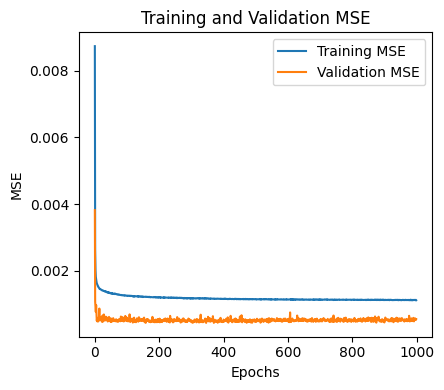

In [100]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [102]:
mse_at_epoch_500 = history.history['mean_squared_error'][500]  

print(mse_at_epoch_500)

mse_at_epoch_200 = history.history['mean_squared_error'][200]  

print(mse_at_epoch_200)

0.001156431157141924
0.0012046757619827986
